<a href="https://colab.research.google.com/github/Hefajtur/ML/blob/main/Outlier_removal_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/csv/weight-height.csv")
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
df.shape

(10000, 3)

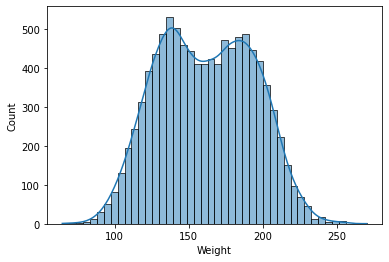

In [5]:
sns.histplot(df['Weight'], kde=True)

In [6]:

mean_value=df['Weight'].mean()
mean_value

161.44035683283076

In [7]:
std_value=df['Weight'].std()
std_value

32.108439006519596

In [8]:
std_3= mean_value + (2.5 * std_value)
std_3

241.71145434912975

In [9]:
neg_std_3= mean_value - (2.5 * std_value)
neg_std_3

81.16925931653176

In [10]:
df[df['Weight'] < neg_std_3]

,Gender,Height,Weight
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7935,Female,58.211650,77.523774
8241,Female,56.167299,77.898559
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [11]:
df[df['Weight']> std_3]

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [12]:
merge_outliers = df[(df['Weight'] > std_3) | (df['Weight'] < neg_std_3)]
merge_outliers


,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [13]:
merge_outliers.shape 

(27, 3)

In [14]:
remove_out_columns = df[(df['Weight'] < std_3) & (df['Weight'] > neg_std_3)]
remove_out_columns

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [15]:
remove_out_columns.shape

(9973, 3)

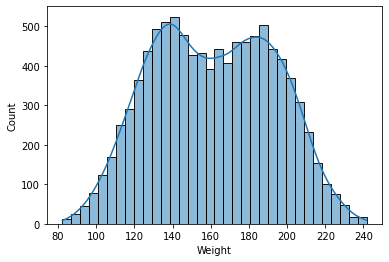

In [16]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [17]:
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)
dummy_variables

,Male
1,1
2,1
3,1
4,1
5,1
...,...
9995,0
9996,0
9997,0
9998,0


In [18]:
new_df = remove_out_columns.drop('Gender',axis=1)
new_df

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [19]:
df = pd.concat([new_df,dummy_variables], axis=1)

In [20]:
df.head()

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1


In [21]:
df.tail()

,Height,Weight,Male
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0
9999,61.944246,113.649103,0


In [22]:
x = df.drop('Height', axis=1)

In [23]:
y = df['Height']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [26]:
xtrain.shape

(6981, 2)

In [27]:
xtest.shape

(2992, 2)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg  = LinearRegression()

In [30]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [31]:
reg.predict(xtest)

array([65.93908337, 71.2885776 , 69.35055021, ..., 66.50690792,
       63.97453349, 62.64210708])

In [32]:
pred = reg.predict(xtest)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
mean_squared_error(ytest, pred)

2.1062111119133307

In [35]:
r2_score(ytest,pred)

0.8554817940443755

# KNN Regressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=100)

In [37]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [39]:
pred2 = knn.predict(xtest)

In [40]:
mean_squared_error(ytest, pred2)

2.166152928577387

In [41]:
r2_score(ytest,pred2)

0.8513688711958483